<a href="https://colab.research.google.com/github/12345997/Spambase-project/blob/main/Copy_of_Spambase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Defining the Question

> ## Specifying the Data Analytic Question

to find the possibility that a message received is a spam or not

> ## Defining the Metric for success
to use the naive bayes classisier to clasifier that a message is a ham or not

> ## Data Relevance


> ## Recording the Experimental Design



*   importing the libraries
*   loading the dataset to our environment
*   Data exploration and libraries
*   Exploratory data analysis
*   implementing the solution
*   challenging the solution



#2.importing the libraries 

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re


In [ ]:
with open('/content/spambase.names') as f:
 text = f.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
spam_data = pd.read_csv('/content/spambase.data', header=None, names=labels
+['spam'])
#spam = spam_data.pop('spam')


In [ ]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#3.Data exploration and **cleaning**

In [ ]:
#renaming the column spam to class
spam_mail_data = spam_data.rename(columns={'spam':'class'})

In [ ]:
#checking whether our data has duplicated values
spam_mail_data.duplicated().sum()

391

In [ ]:
spam_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [ ]:
#dropping duplicated values
spam_mail=spam_mail_data.drop_duplicates(subset=None, inplace=True)

In [ ]:
#checking the description our the dataset we have for analysis
spam_mail.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

All of the data, except the class, is numerical 
39% of the emails in the dataset are classified as spams 
All the frequency data is between 0 and 100, all of the spam data is 0 or 1 : so their is no outlier

In [ ]:
#checking for null values
spam_mail.isna().any().any()

False

###checking for outliers in out dataset

In [ ]:
# Using the IQR formula
Q1 = spam_mail.quantile(0.25)
Q3 = spam_mail.quantile(0.75)
IQR = Q3 - Q1
((spam_mail < (Q1 - 1.5 * IQR)) | (spam_mail > (Q3 + 1.5 * IQR))).sum()

word_freq_make                 982
word_freq_address              811
word_freq_all                  293
word_freq_3d                    46
word_freq_our                  449
word_freq_over                 933
word_freq_remove               762
word_freq_internet             767
word_freq_order                722
word_freq_mail                 748
word_freq_receive              651
word_freq_will                 250
word_freq_people               806
word_freq_report               336
word_freq_addresses            305
word_freq_free                 830
word_freq_business             906
word_freq_email                972
word_freq_you                   58
word_freq_credit               389
word_freq_your                 193
word_freq_font                 112
word_freq_000                  619
word_freq_money                659
word_freq_hp                  1012
word_freq_hpl                  789
word_freq_george               667
word_freq_650                  452
word_freq_lab       

the dataset contained alot of none valuesbut i didn't drop them because they were an actual representation of our dataset hence drpping them will lead to wrong results

correlation

#4.Exploratory Data Analysis

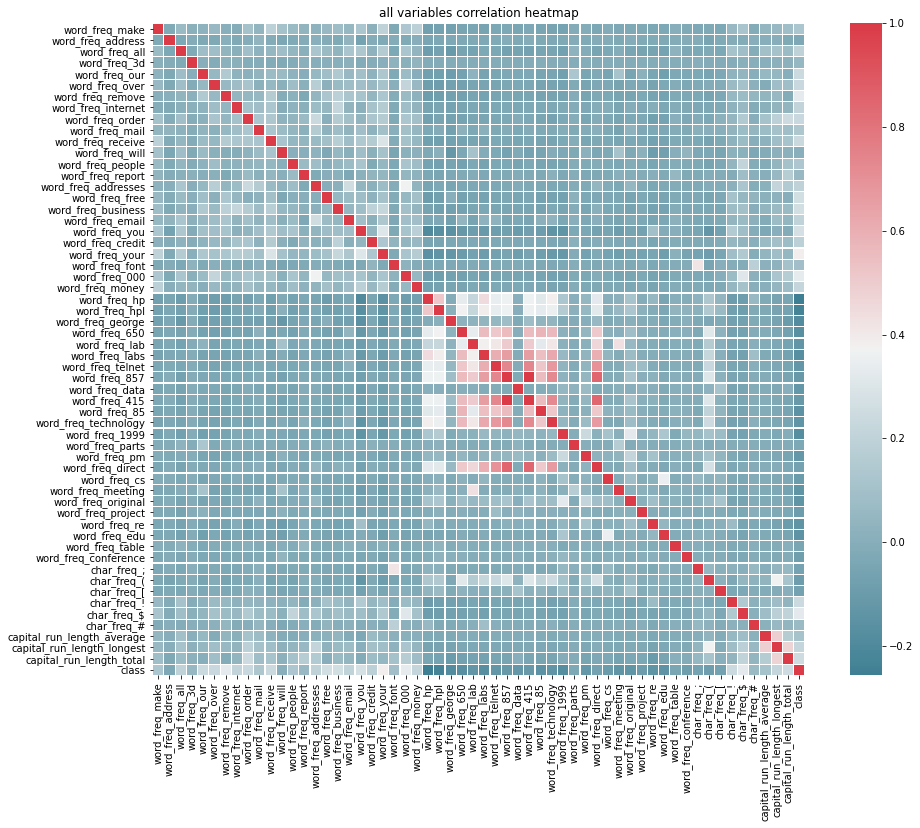

In [ ]:
#checking between our datasets
corr=spam_mail.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
xticklabels=corr.columns,
 yticklabels=corr.columns,
 cmap=sns.diverging_palette(220, 10, as_cmap=True),
 square=True,
 linewidths=.1)
ax.set(title="all variables correlation heatmap");

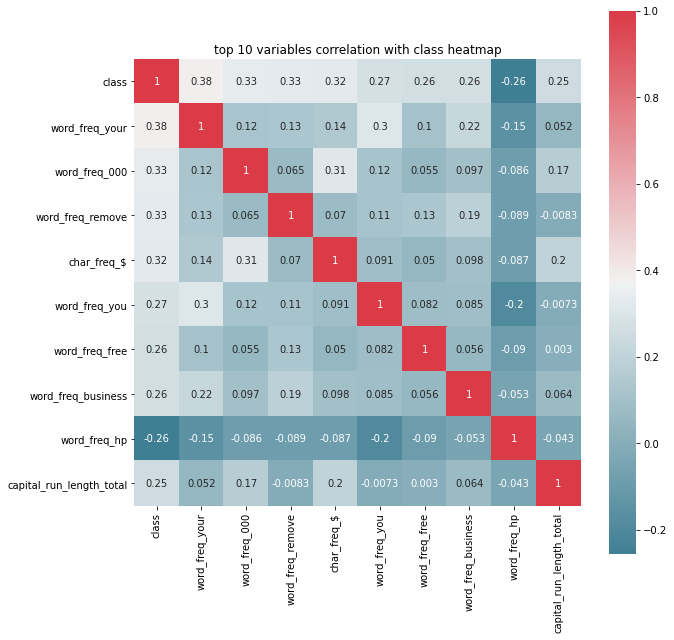

In [ ]:
#top correlation with class (negativ and positiv)
k=10 #number of variables
cols=corr.abs().nlargest(k,'class')['class'].index
cm=np.corrcoef(spam_mail[cols].values.T)
plt.figure(figsize=(10, 10))
ax=sns.heatmap(cm,yticklabels=cols.values,
 xticklabels=cols.values,
 cmap=sns.diverging_palette(220, 10, as_cmap=True),
 annot=True,
 square=True)
ax.set(title=f"top {k} variables correlation with class heatmap");
plt.show()

The correlation between class and the top 10 variable is low

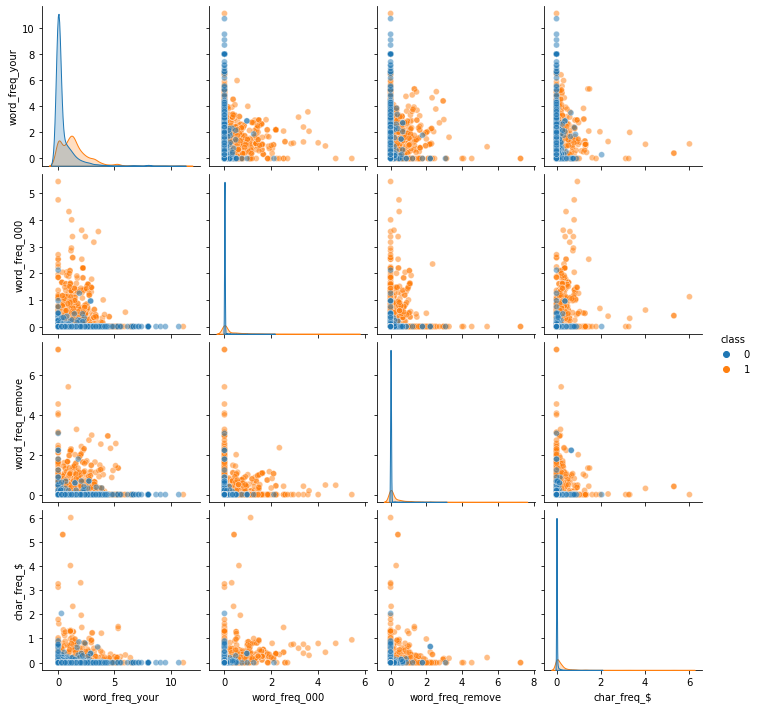

In [ ]:
#pair plot top 4 most correlated var
sns.pairplot(data=spam_mail[cols[:5].values],hue="class",plot_kws={'alpha':0.5
});

Average word frequency in spam vs non spam

it can be seen that from the plot that most messages were spam while the others were non spam



In [ ]:
#creating a pivoted table for the freq columns
pivot_class_freq=pd.pivot_table(spam_mail,values=spam_mail.drop(["class","capital_run_length_average","capital_run_length_longest","capital_run_length_total"],axis=1),index='class',aggfunc="mean")
pivot_class_freq

,char_freq_!,char_freq_#,char_freq_$,char_freq_(,char_freq_;,char_freq_[,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,word_freq_650,word_freq_85,word_freq_857,word_freq_address,word_freq_addresses,word_freq_all,word_freq_business,word_freq_conference,word_freq_credit,word_freq_cs,word_freq_data,word_freq_direct,word_freq_edu,word_freq_email,word_freq_font,word_freq_free,word_freq_george,word_freq_hp,word_freq_hpl,word_freq_internet,word_freq_lab,word_freq_labs,word_freq_mail,word_freq_make,word_freq_meeting,word_freq_money,word_freq_order,word_freq_original,word_freq_our,word_freq_over,word_freq_parts,word_freq_people,word_freq_pm,word_freq_project,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.109984,0.021713,0.011648,0.158578,0.050281,0.022684,0.007088,0.197744,0.000886,0.077787,0.193806,0.169455,0.077306,0.244466,0.008318,0.200581,0.048346,0.051227,0.007579,0.072027,0.150986,0.083117,0.287184,0.097292,0.045226,0.073587,1.265265,0.895473,0.431994,0.038415,0.162794,0.165854,0.167170,0.073479,0.216808,0.017138,0.038049,0.070581,0.181040,0.044544,0.018723,0.061664,0.121679,0.126636,0.415760,0.021711,0.009383,0.042403,0.008192,0.141671,0.106033,0.536324,1.270341,0.438702
1,0.513713,0.078877,0.174478,0.108970,0.020573,0.008199,0.247055,0.043469,0.164672,0.001776,0.018798,0.006928,0.000518,0.164650,0.112079,0.403795,0.287507,0.002101,0.205521,0.000055,0.014562,0.036718,0.014727,0.319228,0.238036,0.518362,0.001550,0.017479,0.009173,0.208141,0.000684,0.005968,0.350507,0.152339,0.002443,0.212879,0.170061,0.008450,0.513955,0.174876,0.004710,0.143547,0.012427,0.006244,0.125091,0.118434,0.275405,0.083574,0.001219,0.029515,0.001274,0.549972,2.264539,1.380370


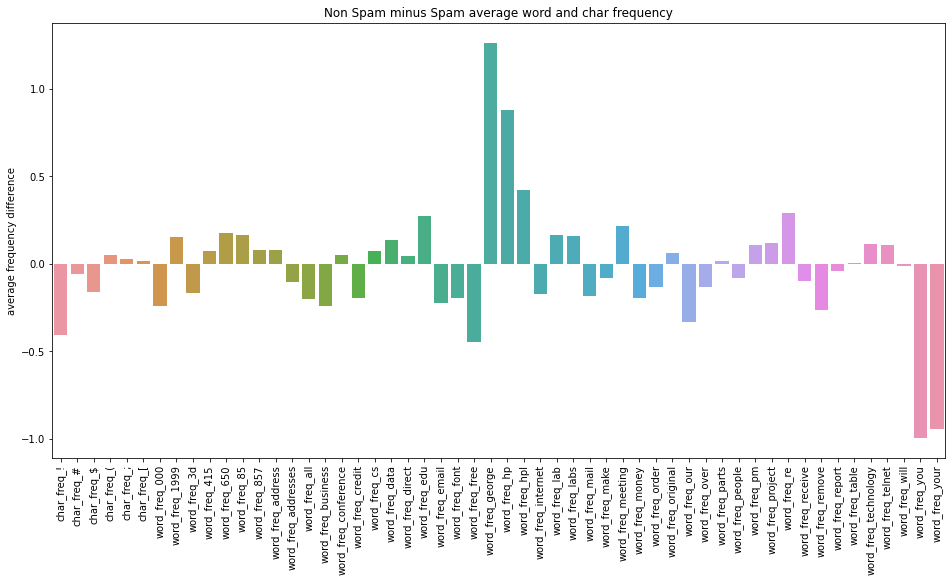

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x=pivot_class_freq.columns,
 y=pivot_class_freq.iloc[0]-pivot_class_freq.iloc[1]).set(title="Non Spam minus Spam average word and char frequency",ylabel="average frequency difference");


The words "you" and "your" are fare more frequent in spam emails than in non spam.

The words "george" and "hp" are fare more frequent in non spam emails than in spam.

Interpretation : spamer don't know your name and call you "you" instead of your name (George ?)

In [ ]:
#creating a pivoted table for the capital columns

pivot_class_cap=pd.pivot_table(spam_mail,values=spam_mail[["capital_run_length_average","capital_run_length_longest","capital_run_length_total"]],index='class',aggfunc="mean")
pivot_class_cap


,capital_run_length_average,capital_run_length_longest,capital_run_length_total
class,,,
0,2.377301,18.214491,161.470947
1,9.519165,104.393271,470.619415


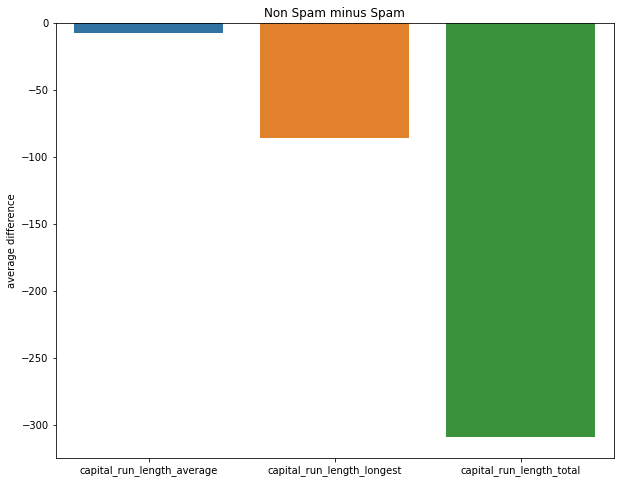

In [ ]:
#plot to show the frequency of a word being capitalised 
plt.figure(figsize=(10,8))
plt.xticks()
sns.barplot(x=pivot_class_cap.columns,
 y=pivot_class_cap.iloc[0]-pivot_class_cap.iloc[1]).set(title="Non Spam minus Spam",ylabel="average difference");


Capital letters are used far more in spam emails than in non spam emails


#5.Implementing the solution

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#performing feature extraction from our data, it is time to build our model.
X = spam_mail.iloc[:, :-1].values
y = spam_mail.iloc[:, 57].values

In [ ]:
#   splitting our data into training and test sets with a 20% test set and 80% as training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

KNeighborsClassifier

In [ ]:
#checking the mean accuracy using the kneighborsClssifier
KNN = KNeighborsClassifier()

scoring = ['accuracy']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)


KNN_accuracy = scores['test_accuracy'].mean()


In [ ]:
#printing out the accuracy score of our model
print(KNN_accuracy)

0.7859379402648633


In [ ]:
print(KNN_precision)

0.7784260723624652


###Naive Bayes classifier

In [ ]:
#checking the accuracy of our built model using GaussianNB classifier of Naive Bayes
bayes = GaussianNB()

scoring = ['accuracy']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())

bayes_accuracy = scores['test_accuracy'].mean()



In [ ]:
print(bayes_accuracy)

0.8251391236968161


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
bayes = GaussianNB()



# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8254156769596199


In [ ]:
# using  the confusion matrix to show the summmary of perfomance the prediction of classification matrix  
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[363 135]
 [ 12 332]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       498
           1       0.71      0.97      0.82       344

    accuracy                           0.83       842
   macro avg       0.84      0.85      0.83       842
weighted avg       0.86      0.83      0.83       842



MULTINOMIALNB CLASSIFIER

In [ ]:
#fitting our model to multinomialNB naive bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8254156769596199


In [ ]:
# importing confusion matrix
# using  the confusion matrix to show the summmary of perfomance the prediction of classification matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[434  64]
 [ 89 255]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       498
           1       0.80      0.74      0.77       344

    accuracy                           0.82       842
   macro avg       0.81      0.81      0.81       842
weighted avg       0.82      0.82      0.82       842



In [ ]:
#performing feature extraction from our data uncleaned data
X = spam_mail_data.iloc[:, :-1].values
y = spam_mail_data.iloc[:, 57].values

In [ ]:
#   splitting our data into training and test sets with a 20% test set and 80% as training set
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#fitting our model to multinomialNB naive bayes on our uncleaned data
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [ ]:
#making predictions using our uncleaned data
yy_pred = model.predict(XX_test)
print(np.mean(predicted == yy_test))

0.5095011876484561


In [ ]:
# importing confusion matrix
# using  the confusion matrix to show the summmary of perfomance the prediction of classification matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yy_test, yy_pred))
print(classification_report(yy_test, yy_pred))

[[446  86]
 [107 203]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       532
           1       0.70      0.65      0.68       310

    accuracy                           0.77       842
   macro avg       0.75      0.75      0.75       842
weighted avg       0.77      0.77      0.77       842



#*6*.Conclusion



```
# in conclusion we can see that from our results that the accuracy of our prediction is 82.54% which is fairly 
acceptable, thus  the accuracy of a message being a spam or not as per bernoullNB clasifier is 84.5%
```



#7.Challenging the solution


```
from the results the accuracy is fairly accurate hence we still need some ore data so  that we increase the accuracy of our prediction from 82.54% to 95%
```




#8.Follow up questions

### a). Did we have the right data? **yes**

### b). Do we need other data to answer our question? **yes, so the we increase the accuracy of our prediction**

### c). Did we have the right question? **yes**